###신용카드 사용자 연체 예측 AI 경진대회

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
train = pd.read_csv('/content/drive/MyDrive/credit/open/train.csv')
test = pd.read_csv('/content/drive/MyDrive/credit/open/test.csv')

In [28]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age_group,working_year
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,30S,13
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,30S,5
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,50S,13
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,40S,6
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,40S,6


In [27]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [6]:
train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

직업 유형(occyp_type)만 8171개의 결측치가 존재하는 상황

In [26]:
train.nunique()

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          18
family_size         10
begin_month         61
credit               3
Age_group            5
working_year        45
dtype: int64

FLAG_MOBIL 변수는 모든 값이 1이므로 data preprocessing 과정에서 제거하도록 하자

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

###EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def custom_countplot(data_df, col_name, ax=None):
    c_plot = sns.countplot(x=col_name, data=data_df, ax=ax)
    for g in c_plot.patches:
        c_plot.annotate(f"{g.get_height()}",
                        (g.get_x()+g.get_width()/3,
                         g.get_height()+60))

In [25]:
cat_cols

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type', 'Age_group', 'working_year'],
      dtype='object')

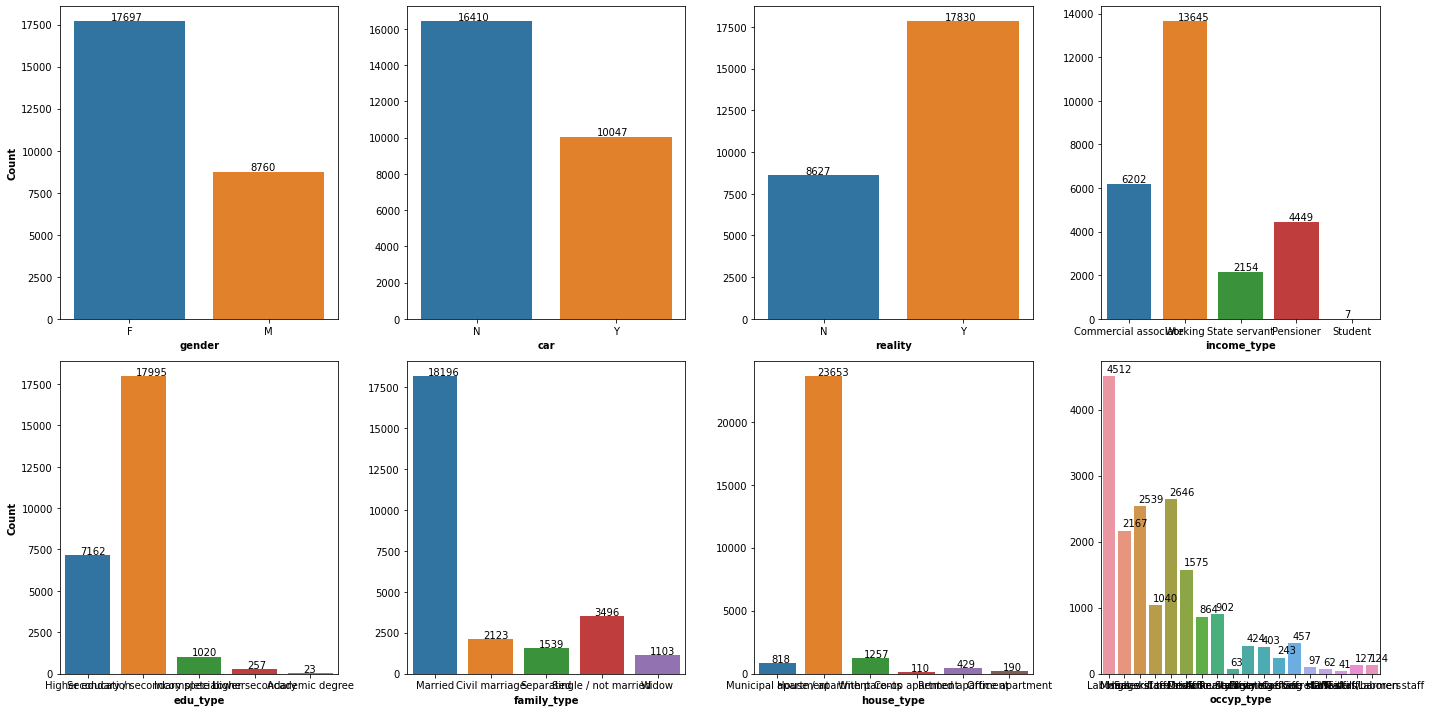

In [30]:
cat_cols = train.loc[:, train.dtypes == object].columns
n = len(cat_cols)

fig, axs = plt.subplots(2, 4, figsize=(20,10))
axs = axs.flatten()

# iterate through each col and plot
for i, col_name in enumerate(cat_cols):
    custom_countplot(train, col_name, ax=axs[i])
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')
    
    if (i != 0 and i != 4):
        axs[i].set_ylabel('')
        
plt.tight_layout()

그림이 작아서 표기를 확인하기 어려운 그래프들은 다시 한 번 확인해보도록 하자

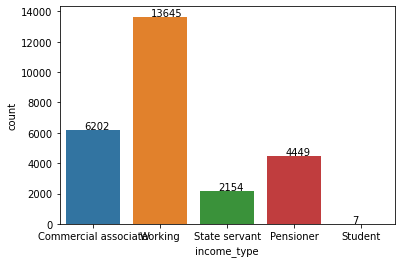

In [13]:
custom_countplot(train, 'income_type')

소득 유형중 학생은 7명에 불과한것을 알 수 있다.

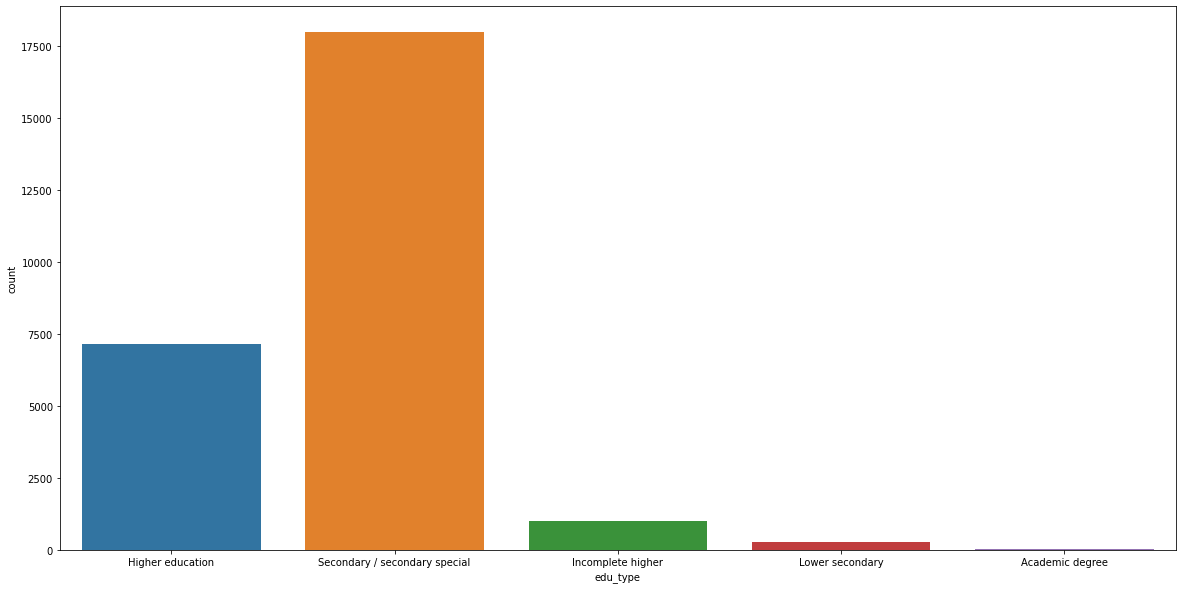

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='edu_type',data=train)

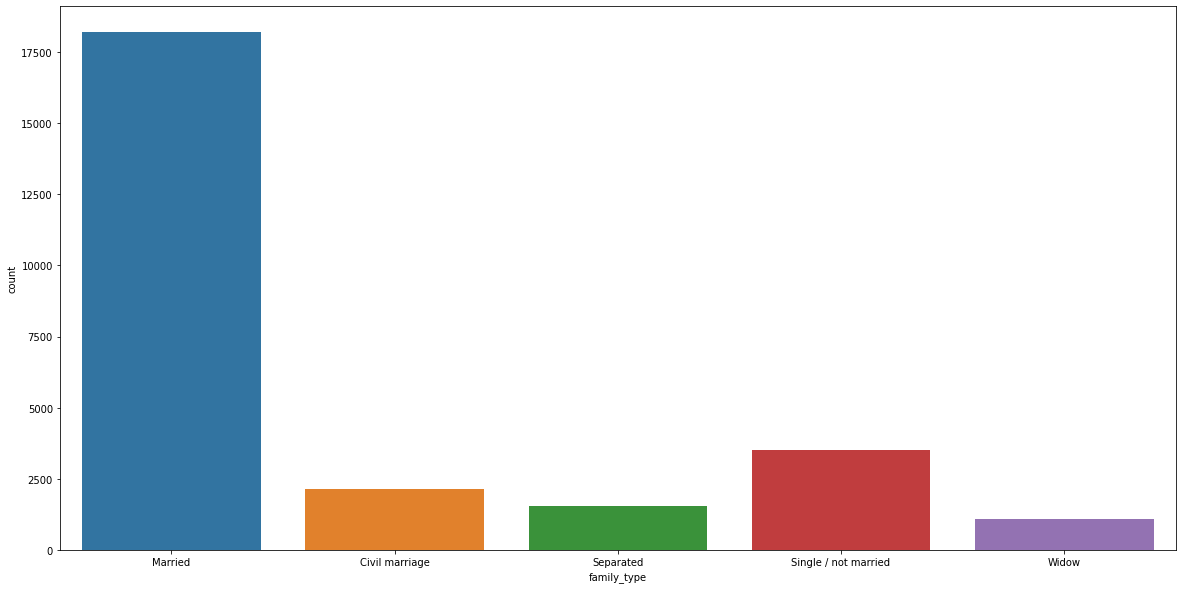

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='family_type',data=train)

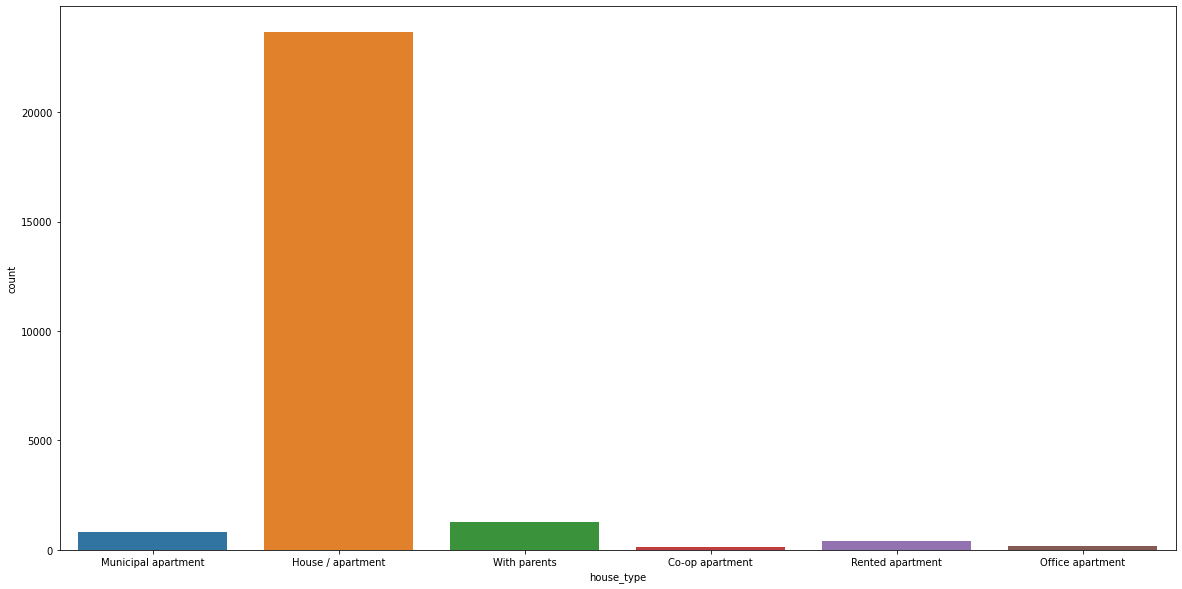

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='house_type',data=train)

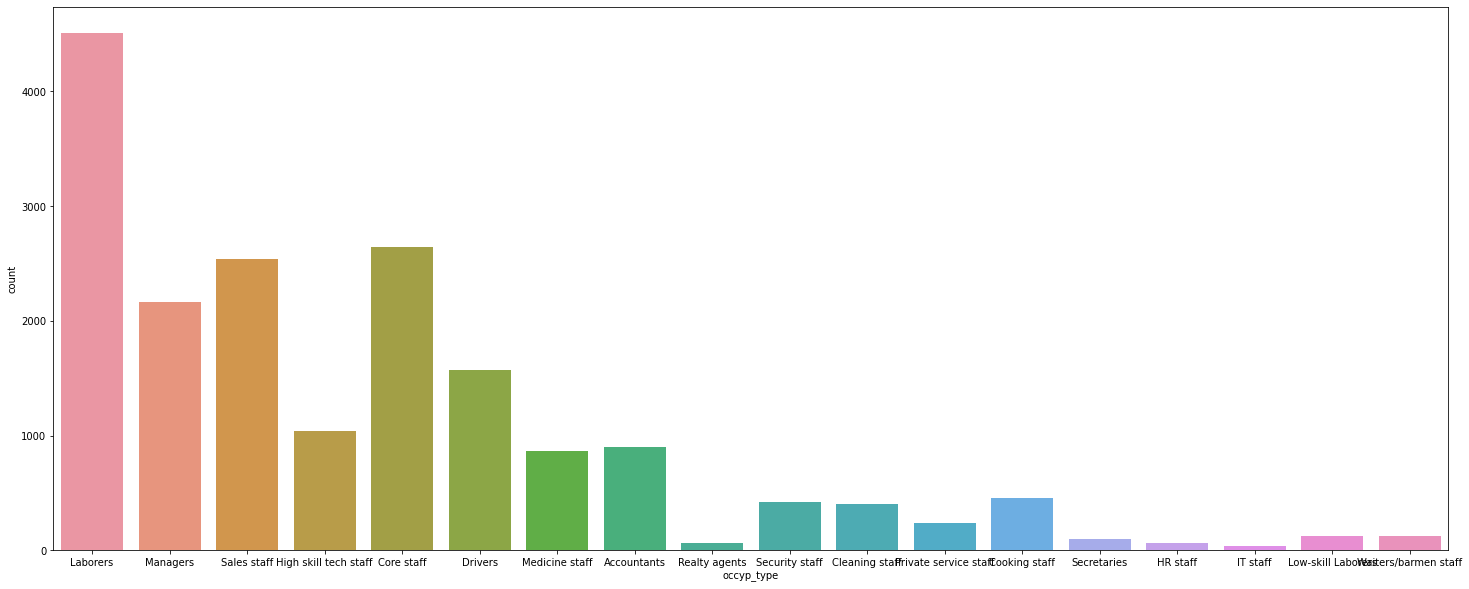

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(x='occyp_type',data=train)

In [15]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    credit_0 = train[train['credit']==0][feature].value_counts()
    credit_1 = train[train['credit']==1][feature].value_counts()
    credit_2 = train[train['credit']==2][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i+1, aspect='equal')
        plt.pie([credit_0[index], credit_1[index], credit_2[index]], labels=['Credit:0','Credit:1','Credit:2'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
        
    plt.show()

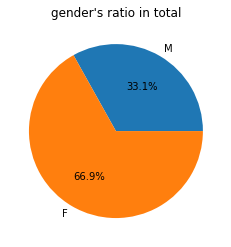

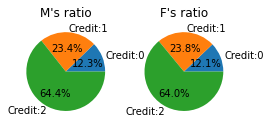

In [ ]:
pie_chart('gender')

성별에 관계 없이 유사한 비율의 신용등급을 보이고 있다.

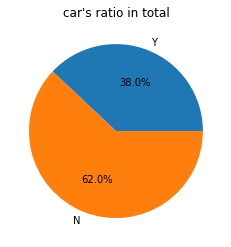

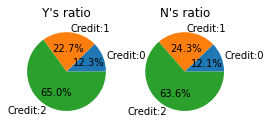

In [ ]:
pie_chart('car')

차량 보유 여부와 관계 없이 유사한 비율의 신용등급을 보이고 있다.

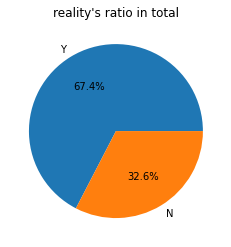

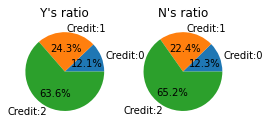

In [ ]:
pie_chart('reality')

In [16]:
def bar_chart(feature):
    credit_0 = train[train['credit']==0][feature].value_counts()
    credit_1 = train[train['credit']==1][feature].value_counts()
    credit_2 = train[train['credit']==2][feature].value_counts()
    df = pd.DataFrame([credit_0,credit_1,credit_2])
    df.index = ['Credit:0','Credit:1','Credit:2']
    df.plot(kind='bar',stacked=True,figsize=(10,5))    

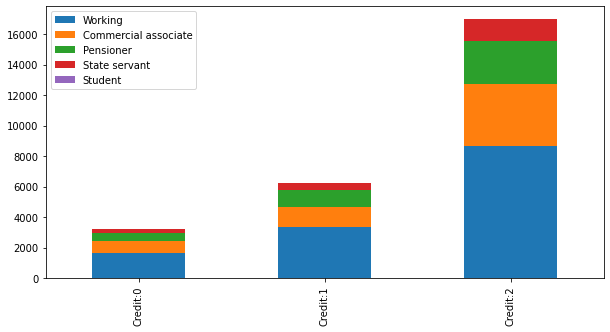

In [ ]:
bar_chart('income_type')

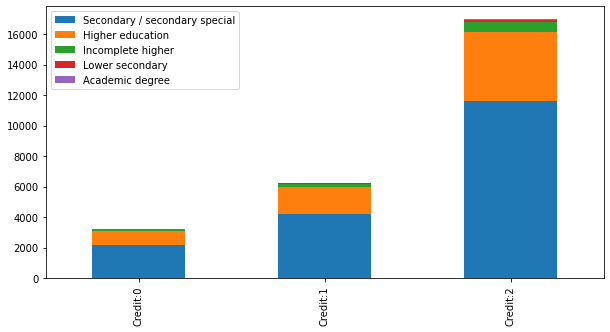

In [ ]:
bar_chart('edu_type')

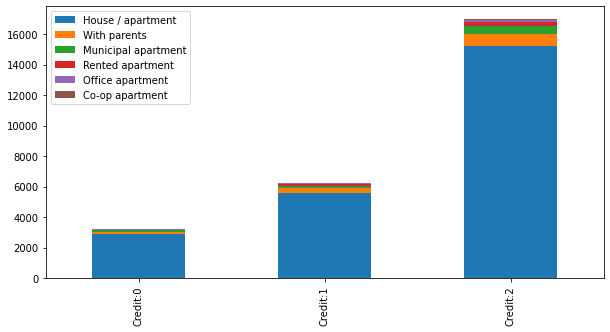

In [ ]:
bar_chart('house_type')

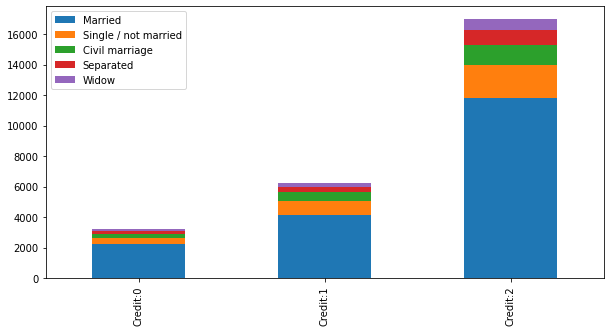

In [ ]:
bar_chart('family_type')

In [ ]:
plot_cols = train.loc[:, train.dtypes != object].drop(columns=['index']).columns.values
corr = train.loc[:, plot_cols].corr()

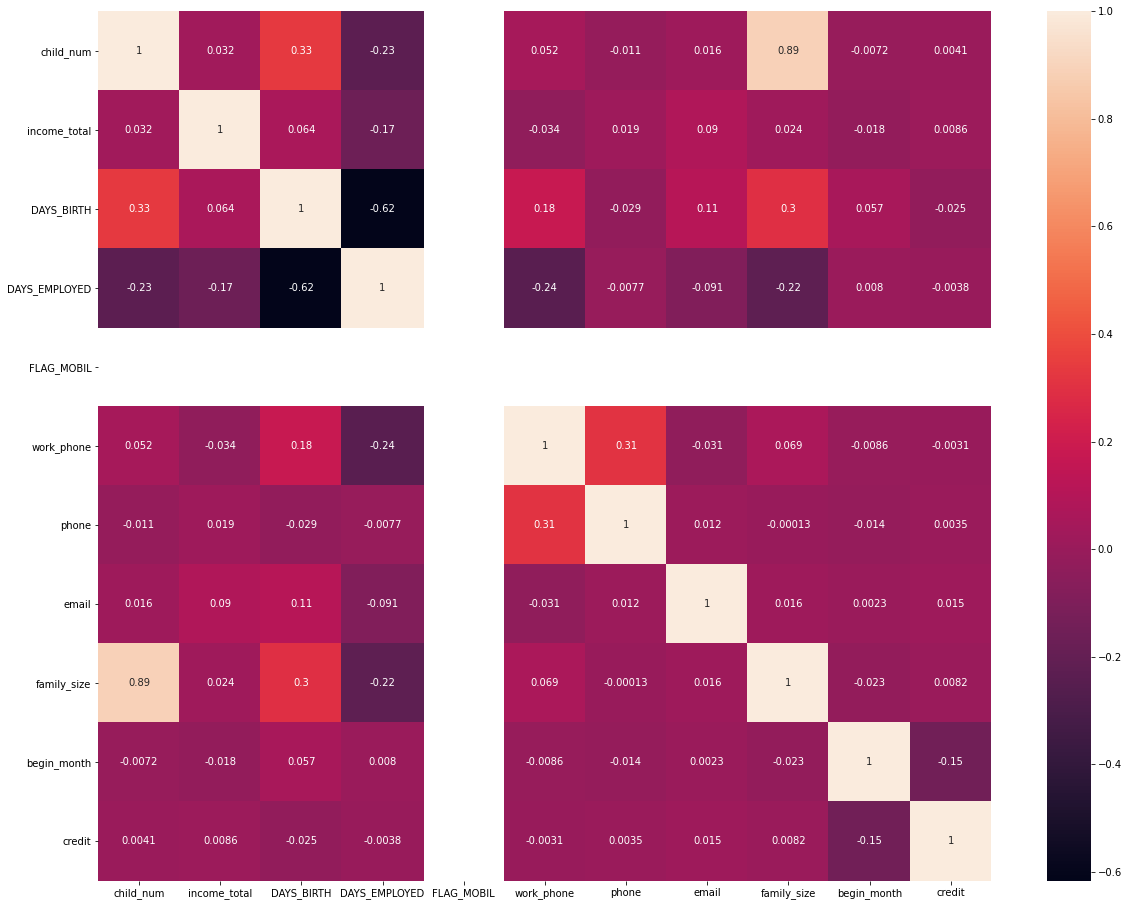

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


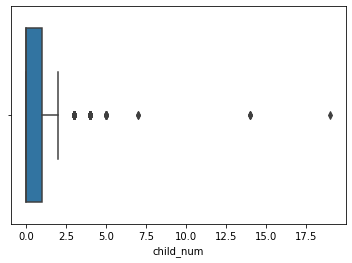

In [17]:
sns.boxplot(train['child_num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


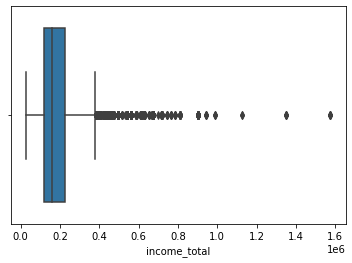

In [ ]:
sns.boxplot(train['income_total'])

### Continuous variable 분석

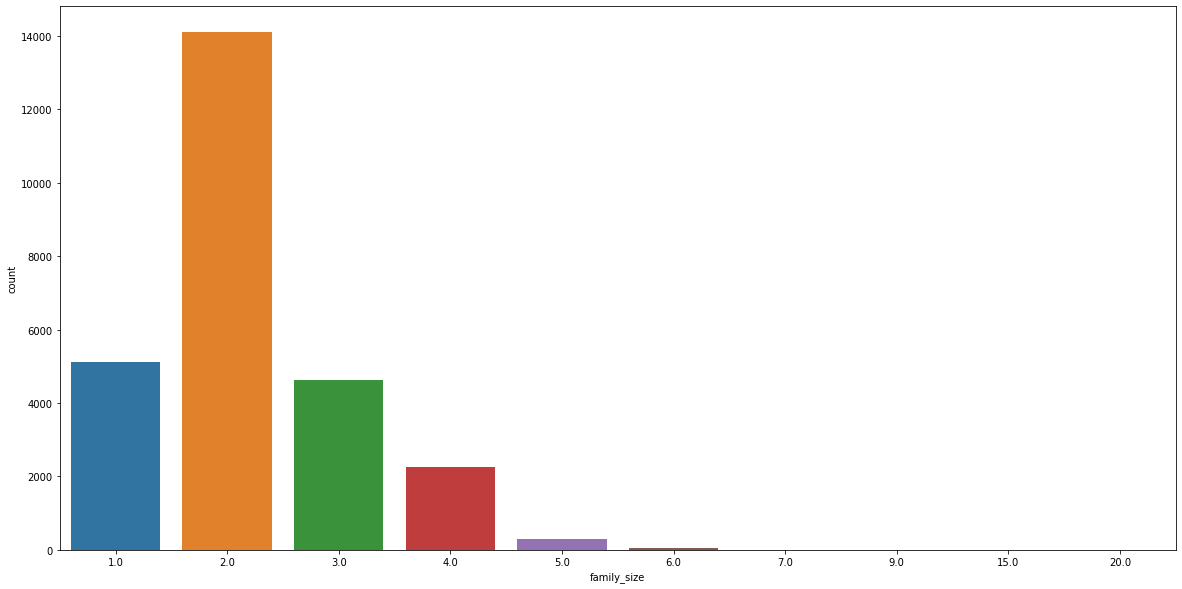

In [52]:
#family size
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='family_size',data=train)

In [53]:
# Begin month -> 연차별로 그룹을 만들어 시각화

for month in range(len(train["begin_month"])):
  train.loc[month:month,("begin_month_group")] = '{year}Y'.format(year = int(train.loc[month,('begin_month')]/(-12)) )

In [32]:
# Day Birth -> 연령대별로 그룹을 만들어 시각화(20대, 30대, 40대, 50대, 60대)

for age in range(len(train["DAYS_BIRTH"])):
  train.loc[age:age,("Age_group")] = '{year}0S'.format(year = int(train.loc[age,('DAYS_BIRTH')]/(-3650)) )
  

In [33]:
# Day Employed -> 근속연수 기준으로 그룹을 만들어 시각화
for year in range(len(train["DAYS_EMPLOYED"])):
  if train.loc[year,("DAYS_EMPLOYED")] >0:
    train.loc[year:year,("working_year")] = "None"
  else:
    train.loc[year:year,("working_year")] = int(((train.loc[year:year,("DAYS_EMPLOYED")]/-365)+1))

In [36]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age_group,working_year
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,30S,13
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,30S,5
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,50S,13
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,40S,6
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,40S,6


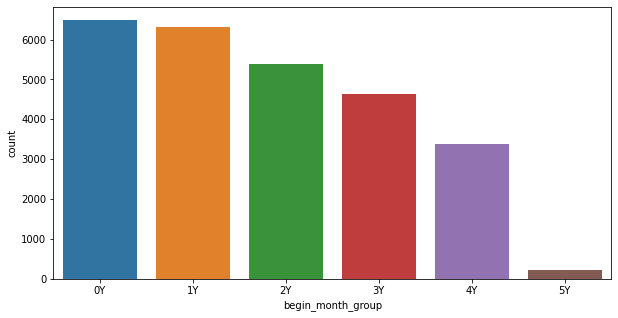

In [56]:
# 신용카드 사용 기간 분포
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='begin_month_group',data=train, order= ["0Y","1Y","2Y","3Y","4Y","5Y"])

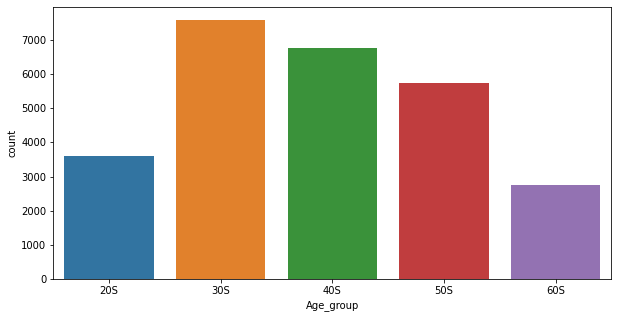

In [21]:
# 연령대 분포
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Age_group',data=train, order= ["20S","30S","40S","50S","60S"])

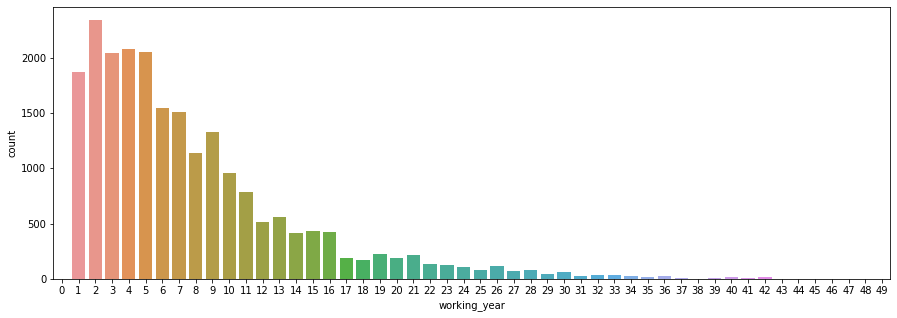

In [44]:
# 근속년수 분포
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='working_year',data=train, order= [i for i in range(0,50)])

In [51]:
# 근속년수 별 비율이 어떻게 되는지 보기 위해 누적 그래프 활용차별 비율이 어떻게 되는지 보기 위해 누적 그래프 활용
year = [i for i in range(0,50)]
count =[]
cum = []
sum = 0
for i in range(0,50):
  count.append(np.count_nonzero(train["working_year"] == i))

for count in count:
  sum +=count
  cum.append(sum)

percentage = [cum[i]/cum[-1]*100 for i in range(len(cum))]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


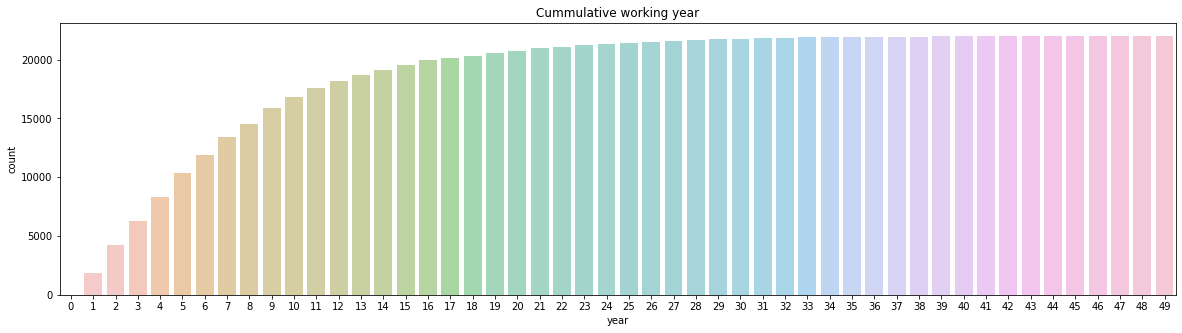

In [41]:
# 근속년수 누적(count)
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(year, cum, alpha=0.5)
plt.title('Cummulative working year')
plt.xlabel('year')
plt.ylabel('count')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


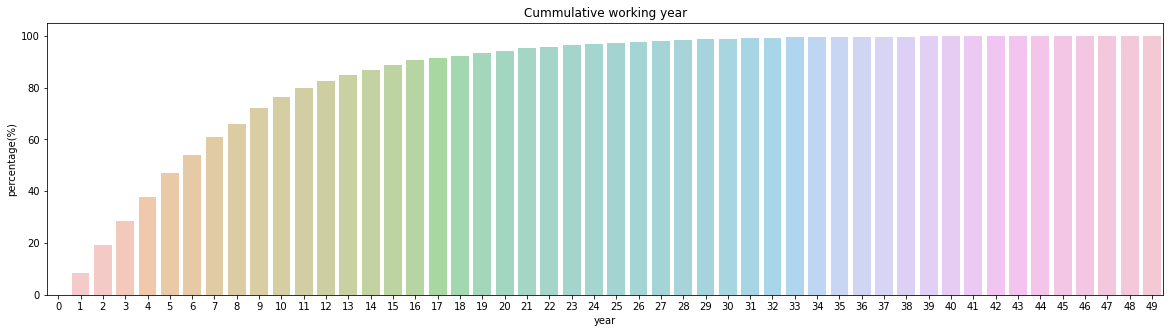

In [50]:
# 근속년수 누적(percentage) -> 근속년수는 초년차, 저년차, 중년차, 고년차 이정도로 나누면 좋을거 같은데 그 기준은 같이 고민해보자
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(year, percentage, alpha=0.5)
plt.title('Cummulative working year')
plt.xlabel('year')
plt.ylabel('percentage(%)')

plt.show()